<a href="https://colab.research.google.com/github/jwoonge/ML-algorithms/blob/master/05_non_linear_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20141261 송제웅  
# 05 Logistic Regression for Binary Classification with a non-linear classification boundary


## - function definition
[1] txt file read

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab import drive

drive.mount('/content/gdrive')

def read_data(filename):
    data = np.genfromtxt(filename, delimiter=',')
    pointX = data[:,0]
    pointY = data[:,1]
    label = data[:,2]

    return pointX, pointY, label

[2] Sigmoid Function $\sigma(z) = \frac{1}{1+exp(-z)}$

In [0]:
def sigmoid(z):
    return 1/(1+np.exp(np.float64(-z)+math.e**(-64)))

[3] 다항식 함수 $g(x,y,\theta)=\theta_0f_0(x,y)+\theta_1f_1(x,y)+...+\theta_{k-1}f_{k-1}(x,y)$

In [0]:
def func(thetas, dims, x, y):
    ret=thetas[0]
    for i in range(1,len(thetas)):
        ret += thetas[i]*x**dims[i][0]*y**dims[i][1]
    return ret

[4]  Object Function  
$J(\theta)=\frac{1}{m} \sum_{i=1}^m{-l_i log(\sigma(g(x_i,y_i;\theta))-(1-l_i)log(1-\sigma(g(x_i,y_i;\theta)))}$

In [0]:
def object_func(thetas,dims, x_s,y_s, labels):
    m = len(labels)
    ret = 0
    for i in range(m):
        ret += -labels[i] * math.log(sigmoid(func(thetas,dims,x_s[i],y_s[i]))+np.exp(-64)) /m
        ret += -(1-labels[i])*math.log(1-(sigmoid(func(thetas,dims,x_s[i],y_s[i])))+np.exp(-64)) /m
    return ret

[5] Gradient Descent  
$\theta_k(t+1)=\theta_k(t)-\alpha\frac{1}{m}\sum_{i=1}^m{(\sigma(g(x_i,y_i;\theta)-l_i)}\frac{\delta g(x_i,y_i;\theta_t)}{\delta\theta_k}$  

In [0]:
def gradient_descent(thetas,dims, x_s, y_s, labels, learning_rate):
    thetas_new = []
    m = len(labels)
    for i in range(len(thetas)):
        update = 0
        for j in range(m):
            mult = x_s[j]**dims[i][0] * y_s[j]**dims[i][1]
            update += (sigmoid(func(thetas,dims,x_s[j],y_s[j]))-labels[j])*mult/m
        thetas_new.append(thetas[i]-learning_rate*update)
    return thetas_new

[6] Accuracy

In [0]:
def accuracy(thetas,dims, x_s, y_s, l_s):
    correct = 0
    for i in range(len(l_s)):
        classified = sigmoid(func(thetas,dims, x_s[i],y_s[i]))
        if abs(classified-l_s[i]) < 0.5:
            correct += 1
    return correct/len(l_s)*100

## - Main

txt file 의 데이터를 읽어온다

In [0]:
x_s, y_s, l_s = read_data('gdrive/My Drive/Colab Notebooks/ML assignments/05/data-nonlinear.txt')
x_0 = x_s[l_s==0]
x_1 = x_s[l_s==1]
y_0 = y_s[l_s==0]
y_1 = y_s[l_s==1]

고차식 $g(x,y;\theta)$의 각 항에 대한 차수 설정

In [0]:
#dims = [[0,0],[1,0],[0,1],[2,0],[1,1],[0,2],[3,2],[2,3]]
dims = [[0,0],[1,0],[0,1],[6,0],[0,6],[3,3],[5,2],[2,5]]

반복문을 위한 초기 조건 설정
$\theta_0, \theta_1...\theta_{k-1}$은 각각 1부터 gradient descent (func[5])를 실행

In [0]:
t=0
thetas = [[1 for x in range(len(dims))]]
error_train = [object_func(thetas[t],dims, x_s, y_s, l_s)]
accuracy_train = [accuracy(thetas[t],dims, x_s,y_s,l_s)]
best = 0

gradient descent로 optimization을 하는 반복문  
1회의 반복이 한 번의 최적화 단계가 된다. 

In [0]:
while True:
    thetas_new = gradient_descent(thetas[t],dims, x_s, y_s, l_s, 5)
    thetas.append(thetas_new)
    t += 1
    error_train.append(object_func(thetas[t],dims, x_s, y_s, l_s))
    accuracy_train.append(accuracy(thetas[t],dims,x_s,y_s,l_s))
    if t%5000==0:
      print(t, thetas[t], round(accuracy_train[t],2), round(accuracy_train[best],2))
    if accuracy_train[-1] >= accuracy_train[best]:
        best = t
    if t>40000:
        break

best_thetas = thetas[best]

5000 [1.3463988106566496, 1.3384931032176777, 2.351362016494734, -20.093139480362616, -8.852217719159722, -12.263415920123258, -2.3002288214021545, -20.55206707799642] 80.51 80.51
10000 [1.3721158009511505, 1.351084923228165, 2.5289768870801432, -20.06069486016937, -8.884136028446195, -12.21319921596799, -2.826093432960078, -26.919730136122368] 80.51 80.51


## - Result
[1] Plot the training data

*   plot the training data points (x,y) with their labels $l$ in colors (blue for label 0 and red for label 1)

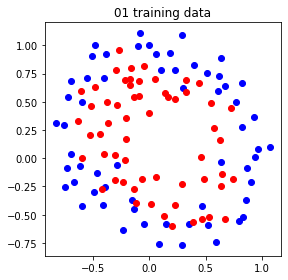

In [15]:
plt.title('01 training data')
plt.scatter(x_0, y_0, c='b')
plt.scatter(x_1, y_1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

[2] Write down the high dimensional function $g(x,y;\theta)$
*   write down the equation for the non-linear function $g(x,y;\theta)$ used for the classifier in LaTeX format  
## $g(x,y;\theta)=\theta_0+\theta_1x+\theta_2y+\theta_3x^2+\theta_4xy+\theta_5y^2+\theta_6x^3y^2+\theta_7x^2y^3$



[3] Plot the training error
*   plot the training error $J(\theta)$ at every iteration of gradient descent until convergence (in blue color)

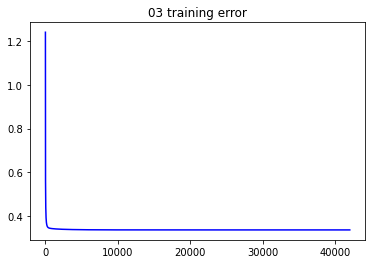

In [16]:
plt.title('03 training error')
plt.plot(error_train, c='b')
plt.show()

[4] Plot the training accuracy
*   plot the training accuracy at every iteration of gradient descent until convergence (in red color)
*   the score will be given depending on the accuracy

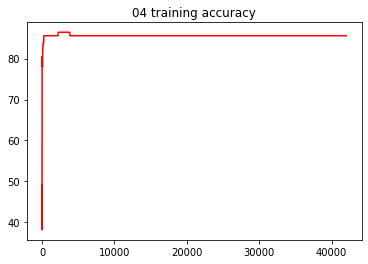

In [17]:
plt.title('04 training accuracy')
plt.plot(accuracy_train, c='r')
plt.show()

[5] Write down the final training accuracy
*   present the final training accuracy in number (%) at convergence
*   the score will be given depending on the accuracy

In [18]:
print('final accuracy : ',accuracy_train[-1])
print('best  accuracy : ',accuracy_train[best])

final accuracy :  85.59322033898306
best  accuracy :  86.4406779661017


[6] Plot the optimal classifier superimposed on the training data
*   plot the boundary of the optimal classifier at convergence (in green color)
*   the boundary of the classifier is defined by $\{(x,y)|\sigma(g(x,y;\theta))=0.5\}=\{(x,y)|g(x,y;\theta)=0\}$
*   plot the training data points $(x,y)$ with their labels $l$ in colors superimposed on the illustration of the classifier (blue for label 0 and red for label 1)

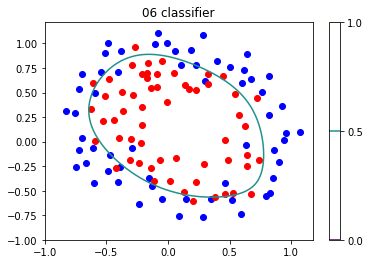

In [19]:
plt.title('06 classifier')
x_range = np.arange(-1,1,0.005)
y_range = np.arange(-1,1,0.005)
x_range, y_range = np.meshgrid(x_range, y_range)
classified = sigmoid(func(thetas[best],dims,x_range,y_range))
plt.contour(x_range,y_range,classified,levels=[0,0.5,1])
plt.colorbar()
plt.scatter(x_0, y_0, c='b')
plt.scatter(x_1, y_1, c='r')
plt.show()